In [25]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.display import Image

import uproot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [2]:
#fDataName = "./gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root"
#fDataName_mc = "./mc_gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root"
#fDataName_full = "./full_gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root"
#fTreeName = "tree"
#data = read_root(fDataName, fTreeName)
#data_mc = read_root(fDataName_mc, fTreeName)
#data_full = read_root(fDataName_full, fTreeName)

In [30]:
#variables_test = (["n30", "n35", "n40", "n45", "n50", "n55", "n60", "n65", "n70", "n75", "n80", "nav", "c30", 
#"c35", "c40", "c45", "c50", "c55", "c60", "c65", "c70", "c75", "c80", ])
#branches = [ "energy", "eecal", "ehcal", "nhits", "nhits_ecal", "nhits_hcal", "time", "etime", "htime", "radius", 
#"eradius", "hradius", "elayer", "hlayer", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", 
#"energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit", "muon_nhits", "muon_time", 
#"muon_layer" ]

#branches = [ "energy", "eecal", "ehcal", "nhits", "nhits_ecal", "nhits_hcal", "radius", "eradius", "hradius", 
#"time", "etime", "htime", "elayer", "hlayer", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", 
#"energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit", "muon_nhits", "muon_time", 
#"muon_layer" ]

branches = ["eecal", "ehcal", "etime", "htime", "eradius", "hradius", "mc_energy"]

#branches = ["energy", "eecal", "ehcal", "etime", "htime"]

#branches = ["c30", "c35", "c40", "c45", "c50", "c55", "c60", "c65", "c70",
#           "c75", "c80"]

In [31]:
# ./gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root

fTreeName = "tree"

data = uproot.pandas.iterate("./gun_k0L_allgev_FTFP_BERT_260000evt_ILD_l5_v02steel.root", fTreeName, branches)
data = pd.concat(list(data))

In [ ]:
data1 = uproot.pandas.iterate("./gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root", fTreeName, "energy")
data1 = pd.concat(list(data1))

In [17]:
data5 = uproot.pandas.iterate("./data/gun_k0L_5gev_FTFP_BERT_10000evt_ILD_l5_v02steel.root", fTreeName, "htime")
data5 = pd.concat(list(data5))

In [18]:
data5

,htime
0,24.912582
1,26.828375
2,24.846424
3,25.820215
4,26.156885
...,...
8627,17.390865
8628,16.694715
8629,31.848833
8630,22.083221


In [ ]:
%%time

count = -1
final = 0.0

for index, value in data1.energy.items():
    for index2, value2 in data1.energy.items():
        if value == value2:
            count += 1
            print(f"Count : {count}, Index : {index}, Index2 : {index2}, Value : {value}, Value2 : {value2}")
            final = index

diff = count - final
print(diff)
print(100 * (diff / len(data1.energy)))

In [ ]:
79811 - 79619

In [ ]:
100 * (192/len(data1.energy))

In [ ]:
data1.keys()

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, data1, train_size = 0.1)

In [ ]:
len(x_train1.energy.unique())

In [ ]:
len(data1.energy.unique())

In [ ]:
len(x_train1.energy) - len(x_train1.energy.unique())

In [ ]:
len(data1.energy) - len(data1.energy.unique())

In [ ]:
len(data1.energy)

In [ ]:
len(data1.energy.unique())

In [19]:
len(data5.htime.unique())

8604

In [20]:
len(data5.htime)

8632

In [8]:
type(data5.energy.unique())

numpy.ndarray

In [ ]:
aaa = pd.DataFrame({'energy': data1.energy.unique()})
aaa

In [ ]:
aaa.energy

In [ ]:
len(aaa.energy)

In [ ]:
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(aaa, aaa, train_size = 0.9)

In [ ]:
len(x_train_a.energy)

In [ ]:
len(x_train_a.energy.unique())

In [ ]:
%%time

count = -1
final = 0.0

for index, value in x_train1.energy.items():
    for index2, value2 in x_train1.energy.items():
        if value == value2:
            count += 1
            print(f"Count : {count}, Index : {index}, Index2 : {index2}, Value : {value}, Value2 : {value2}")
            final = index

#diff = count - final
#print(diff)
#print(100 * (diff / len(x_train1.energy)))

print(count + 1)

In [ ]:
%%time

count = -1
final = 0.0

for index, value in data1.energy.items():
    for index2, value2 in data1.energy.items():
        if value == value2:
            count += 1
            print(f"Count : {count}, Index : {index}, Index2 : {index2}, Value : {value}, Value2 : {value2}")
            final = index

#diff = count - final
#print(diff)
#print(100 * (diff / len(x_train1.energy)))

print(count + 1)

In [ ]:
100 * (2/7962)

In [ ]:
data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, data, train_size = 0.1)

In [ ]:
#for i in range(len(branches)): 
#    print(branches[i], 'and', branches[i])

In [ ]:
#sns.relplot(x="etime", y="ehcal", data = data)
#plt.show()
#sns.relplot(x="htime", y="eecal", data = data)

In [32]:
corrMatrix = data.corr()
corrMatrix

,eecal,ehcal,muon_energy,etime,htime,eradius,hradius,elayer,hlayer,muon_time,muon_layer,mc_energy
eecal,1.000000,0.131429,-0.055831,-0.115008,-0.014099,-0.202531,0.027832,0.172889,-0.152756,0.039403,0.028724,0.585834
ehcal,0.131429,1.000000,0.155594,0.121166,-0.257103,0.085121,-0.299339,0.101742,0.327006,0.405211,0.418303,0.852807
muon_energy,-0.055831,0.155594,1.000000,-0.049307,0.014769,-0.007633,-0.068726,-0.120089,0.306266,0.224953,0.334404,0.212033
etime,-0.115008,0.121166,-0.049307,1.000000,0.023430,0.561189,0.016539,0.364091,-0.137274,0.007689,0.005676,0.035826
htime,-0.014099,-0.257103,0.014769,0.023430,1.000000,0.026714,0.553583,-0.085131,-0.065480,-0.067692,-0.072625,-0.194386
eradius,-0.202531,0.085121,-0.007633,0.561189,0.026714,1.000000,0.163117,0.041665,0.008397,0.018068,0.019396,-0.030379
hradius,0.027832,-0.299339,-0.068726,0.016539,0.553583,0.163117,1.000000,-0.052394,-0.166443,-0.141630,-0.150124,-0.222829
elayer,0.172889,0.101742,-0.120089,0.364091,-0.085131,0.041665,-0.052394,1.000000,-0.323224,-0.054740,-0.062230,0.144776
hlayer,-0.152756,0.327006,0.306266,-0.137274,-0.065480,0.008397,-0.166443,-0.323224,1.000000,0.336597,0.390446,0.229130
muon_time,0.039403,0.405211,0.224953,0.007689,-0.067692,0.018068,-0.141630,-0.054740,0.336597,1.000000,0.769852,0.375865


In [9]:
corrMatrix.keys()

Index(['eecal', 'ehcal', 'energy_hit_ecal', 'energy_hit_hcal', 'muon_energy',
       'muon_energy_hit', 'nhits_ecal', 'nhits_hcal', 'etime', 'htime',
       'eradius', 'hradius', 'elayer', 'hlayer', 'muon_nhits', 'muon_time',
       'muon_layer', 'mc_energy'],
      dtype='object')

In [8]:
corrMatrix.eecal

eecal              1.000000
ehcal              0.131429
energy_hit_ecal    0.157451
energy_hit_hcal   -0.072369
muon_energy       -0.055831
muon_energy_hit    0.013643
nhits_ecal         0.926319
nhits_hcal         0.257508
etime             -0.115008
htime             -0.014099
eradius           -0.202531
hradius            0.027832
elayer             0.172889
hlayer            -0.152756
muon_nhits        -0.060128
muon_time          0.039403
muon_layer         0.028724
mc_energy          0.585834
Name: eecal, dtype: float64

In [ ]:
corrMatrix.eecal

In [ ]:
corrMatrix.eecal.describe()

In [ ]:
thr = 0.3
a = corrMatrix < abs(thr)
a

In [ ]:
data.describe()

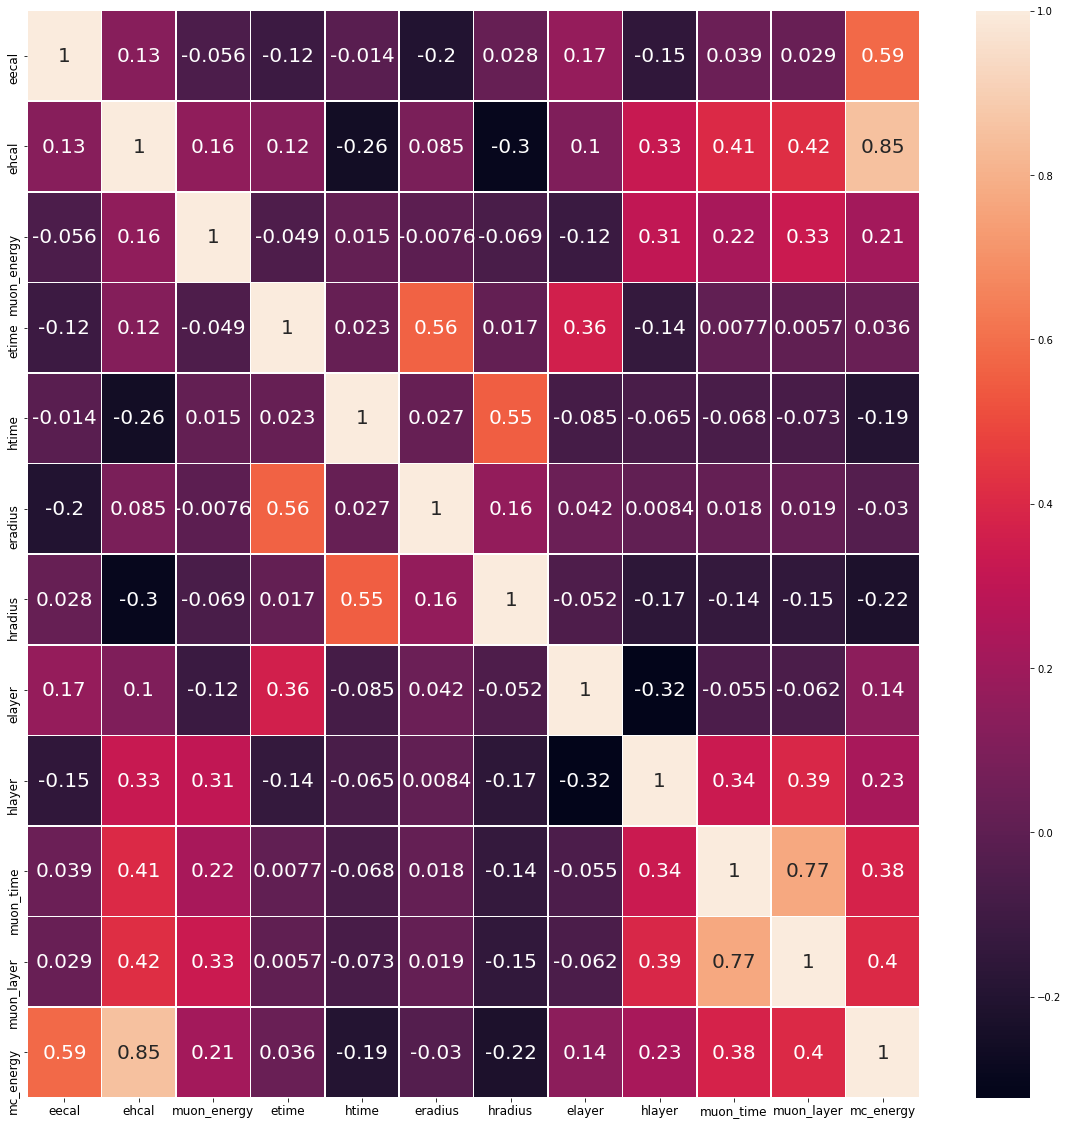

In [49]:
# sns.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
a = sns.heatmap(corrMatrix, annot = True, annot_kws={"size": 20}, linewidths=.5)
a.set_xticklabels(a.get_xmajorticklabels(), fontsize = 12)
a.set_yticklabels(a.get_ymajorticklabels(), fontsize = 12)
plt.rcParams["figure.figsize"] = (20, 20)
plt.savefig('./ann_pict/test.png', dpi = 100)
plt.show()
#print("\n")
#print ("mc_energy and energy is ===", (scipy.stats.pearsonr(data.mc_energy, data.energy))[0])

In [ ]:
#g = sns.clustermap(data, cmap ="YlGnBu", linewidths = 0.1); 
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)  
#cg

In [ ]:
#Image('./ann_pict/test.png')

In [ ]:
plt.rcParams["figure.figsize"] = (80, 80)
sns.pairplot(data)
plt.savefig('./ann_pict/pairplot.png', dpi = 100)
plt.show()

In [ ]:
sns.distplot(x_train, kde=False)

In [ ]:
sns.distplot(data['ehcal'], kde=False)

In [ ]:
sns.distplot(data['htime'])

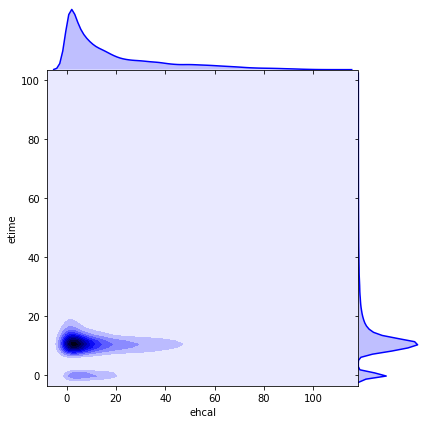

In [33]:
sns.jointplot("ehcal", "etime", data=data, kind="kde", space=0, color="b")

In [ ]:
data.keys()

In [ ]:
data.eecal.plot(kind='hist')
plt.title("eecal")
plt.show()

data.ehcal.plot(kind='hist')
plt.title("ehcal")
plt.show()

data.energy_hit_ecal.plot(kind='hist', logy=True)
plt.title("energy_hit_ecal")
plt.show()

data.energy_hit_hcal.plot(kind='hist', logy=True)
plt.title("energy_hit_hcal")
plt.show()

data.muon_energy.plot(kind='hist', logy=True)
plt.title("muon_energy")
plt.show()

data.muon_energy_hit.plot(kind='hist', logy=True)
plt.title("muon_energy_hit")
plt.show()

data.nhits_ecal.plot(kind='hist')
plt.title("nhits_ecal")
plt.show()

data.nhits_hcal.plot(kind='hist')
plt.title("nhits_hcal")
plt.show()

data.etime.plot(kind='hist')
plt.title("etime")
plt.show()

data.htime.plot(kind='hist')
plt.title("htime")
plt.show()

data.eradius.plot(kind='hist')
plt.title("eradius")
plt.show()

data.hradius.plot(kind='hist')
plt.title("hradius")
plt.show()

data.elayer.plot(kind='hist')
plt.title("elayer")
plt.show()

data.hlayer.plot(kind='hist')
plt.title("hlayer")
plt.show()

data.muon_nhits.plot(kind='hist', logy=True)
plt.title("muon_nhits")
plt.show()

data.muon_time.plot(kind='hist')
plt.title("muon_time")
plt.show()

data.muon_layer.plot(kind='hist')
plt.title("muon_layer")
plt.show()

data.mc_energy.plot(kind='hist')
plt.title("mc_energy")
plt.show()

In [ ]:
nbins = 50

data.eecal.plot(kind='hist', bins=nbins)
plt.title("eecal")
plt.show()

data.ehcal.plot(kind='hist', bins=nbins)
plt.title("ehcal")
plt.show()

data.energy_hit_ecal.plot(kind='hist', logy=True, bins=nbins)
plt.title("energy_hit_ecal")
plt.show()

data.energy_hit_hcal.plot(kind='hist', logy=True, bins=nbins)
plt.title("energy_hit_hcal")
plt.show()

data.muon_energy.plot(kind='hist', logy=True, bins=nbins)
plt.title("muon_energy")
plt.show()

data.muon_energy_hit.plot(kind='hist', logy=True, bins=nbins)
plt.title("muon_energy_hit")
plt.show()

data.nhits_ecal.plot(kind='hist', bins=nbins)
plt.title("nhits_ecal")
plt.show()

data.nhits_hcal.plot(kind='hist', bins=nbins)
plt.title("nhits_hcal")
plt.show()

data.etime.plot(kind='hist', bins=nbins)
plt.title("etime")
plt.show()

data.htime.plot(kind='hist', bins=nbins)
plt.title("htime")
plt.show()

data.eradius.plot(kind='hist', bins=nbins)
plt.title("eradius")
plt.show()

data.hradius.plot(kind='hist', bins=nbins)
plt.title("hradius")
plt.show()

data.elayer.plot(kind='hist', bins=nbins)
plt.title("elayer")
plt.show()

data.hlayer.plot(kind='hist', bins=nbins)
plt.title("hlayer")
plt.show()

data.muon_nhits.plot(kind='hist', logy=True, bins=nbins)
plt.title("muon_nhits")
plt.show()

data.muon_time.plot(kind='hist', bins=nbins)
plt.title("muon_time")
plt.show()

data.muon_layer.plot(kind='hist', logy=True, bins=nbins)
plt.title("muon_layer")
plt.show()

data.mc_energy.plot(kind='hist', bins=nbins)
plt.title("mc_energy")
plt.show()